In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Model
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/icml_face_data.csv')

pixel_data = data[' pixels']
label_data = data['emotion']

In [ ]:
def preprocess_pixels(pixel_data):
  images = []
  for i in range(len(pixel_data)):
    img = np.fromstring(pixel_data[i], dtype='int', sep=' ')
    img = img.reshape(48,48,1)
    images.append(img)

  X = np.array(images)

 

  return X

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='auto')

X_over, Y_over = oversampler.fit_resample(pixel_data.values.reshape(-1,1), label_data)

X_over_series = pd.Series(X_over.flatten())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X = preprocess_pixels(X_over_series)
Y = Y_over
Y = np.array(Y_over).reshape(Y.shape[0],1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 45)

In [ ]:
X_train.shape

(56630, 48, 48, 1)

In [ ]:
X_test.shape

(6293, 48, 48, 1)

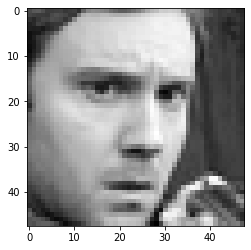

In [ ]:
plt.imshow(X[0,:,:,0],cmap='gray')

In [ ]:
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(32,(3,3),strides=(1,1), padding='valid',activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization(axis=3))

model.add(Conv2D(64,(3,3),strides=(1,1), padding = 'same',activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),strides=(1,1), padding = 'valid',activation='relu'))
model.add(BatchNormalization(axis=3))


model.add(Conv2D(128,(3,3),strides=(1,1), padding = 'same',activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),strides=(1,1), padding = 'valid',activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(7,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 21, 64)        2

In [ ]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train = to_categorical(Y_train, num_classes=7)

y_test = to_categorical(Y_test, num_classes=7)

In [ ]:
model.fit(X_train,y_train,epochs=40,validation_data=(X_test,y_test))

Epoch 1/40
1770/1770 [==============================] - 77s 26ms/step - loss: 1.8891 - accuracy: 0.2857 - val_loss: 1.5114 - val_accuracy: 0.4467
Epoch 2/40
1770/1770 [==============================] - 46s 26ms/step - loss: 1.4845 - accuracy: 0.4318 - val_loss: 1.2506 - val_accuracy: 0.5279
Epoch 3/40
1770/1770 [==============================] - 45s 26ms/step - loss: 1.2853 - accuracy: 0.5093 - val_loss: 1.1245 - val_accuracy: 0.5744
Epoch 4/40
1770/1770 [==============================] - 45s 26ms/step - loss: 1.1512 - accuracy: 0.5592 - val_loss: 1.0452 - val_accuracy: 0.6048
Epoch 5/40
1770/1770 [==============================] - 46s 26ms/step - loss: 1.0598 - accuracy: 0.5957 - val_loss: 0.9835 - val_accuracy: 0.6352
Epoch 6/40
1770/1770 [==============================] - 46s 26ms/step - loss: 0.9790 - accuracy: 0.6272 - val_loss: 0.9353 - val_accuracy: 0.6555
Epoch 7/40
1770/1770 [==============================] - 45s 26ms/step - loss: 0.9076 - accuracy: 0.6530 - val_loss: 0.8882 -

In [ ]:
import tensorflow as tf


In [ ]:
tf.keras.models.save_model(model,'model_csv.h5')